In [106]:
#importing libraries
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_squared_error
from sklearn.preprocessing import MinMaxScaler
from sklearn.linear_model import Ridge

In [107]:
%matplotlib inline

In [108]:
#loading data
data = pd.read_csv('PizzaData.csv')
data.head()

,Pizza Name,Cheese Level,Sauce Tanginess,Spice Level,User Rating,Garlic Level,Crunchiness,Saltiness
0,Margherita,8,6,5,6,4,6,4
1,Peppy Paneer,5,7,5,7,5,4,4
2,Double Cheese Margherita,5,4,5,7,4,6,6
3,Cheese Volcano Peppy Paneer,8,4,5,8,4,4,7
4,Cheese Overload,5,4,5,7,5,6,6


In [109]:
#rearranging columns
colum = data.pop('User Rating')
data.insert(7, 'User Rating', colum)
data.head()

,Pizza Name,Cheese Level,Sauce Tanginess,Spice Level,Garlic Level,Crunchiness,Saltiness,User Rating
0,Margherita,8,6,5,4,6,4,6
1,Peppy Paneer,5,7,5,5,4,4,7
2,Double Cheese Margherita,5,4,5,4,6,6,7
3,Cheese Volcano Peppy Paneer,8,4,5,4,4,7,8
4,Cheese Overload,5,4,5,5,6,6,7


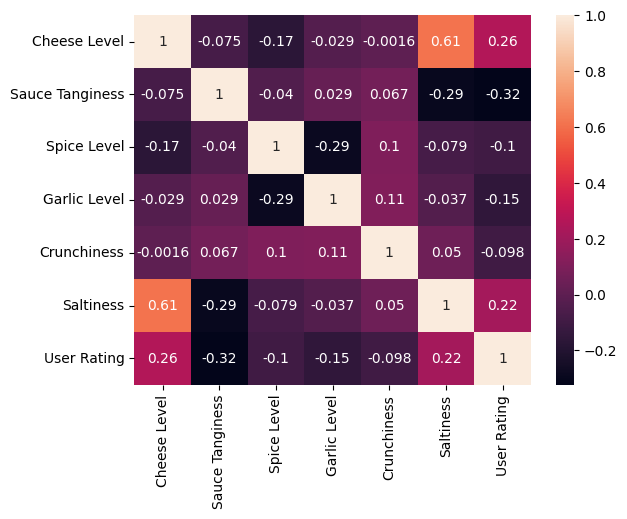

In [110]:
#correlation analysis
dataplot = sns.heatmap(data.corr(numeric_only=True), annot=True)

Cheese Level=> 1.155636327727866

Sauce Tanginess=> 1.127112743463261

Spice Level=> 1.1413316583062663

Garlic Level=> 1.3886415257617692

Crunchiness=> -0.45522214903976244

Saltiness=> 0.7703706887809953

In [111]:
data.columns

Index(['Pizza Name', 'Cheese Level', 'Sauce Tanginess', 'Spice Level',
       'Garlic Level', 'Crunchiness', 'Saltiness', 'User Rating'],
      dtype='object')

In [114]:
#transforming the data
data["Cheese Level"] = np.log1p(data["Cheese Level"])
data["Sauce Tanginess"] = np.log1p(data["Sauce Tanginess"])
data["Spice Level"] = np.log1p(data["Spice Level"])
data["Garlic Level"] = np.log1p(data["Garlic Level"])

In [115]:
#checking skewness after transformation
data["Cheese Level"].skew(), data["Sauce Tanginess"].skew(), data["Garlic Level"].skew(), data["Spice Level"].skew()

(0.8853386097492181, 0.8206996997903011, 0.796958113016981, 0.9214022705460215)

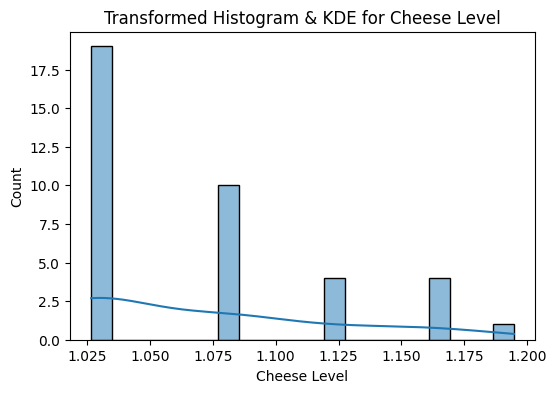

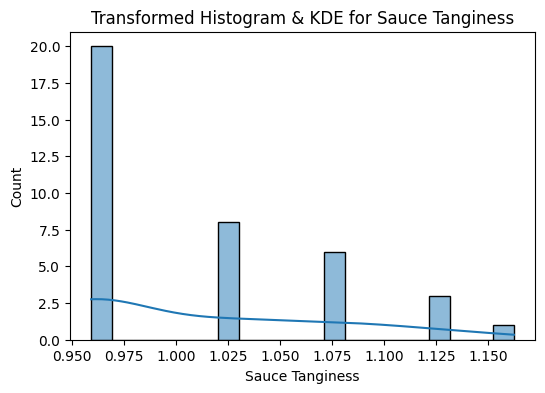

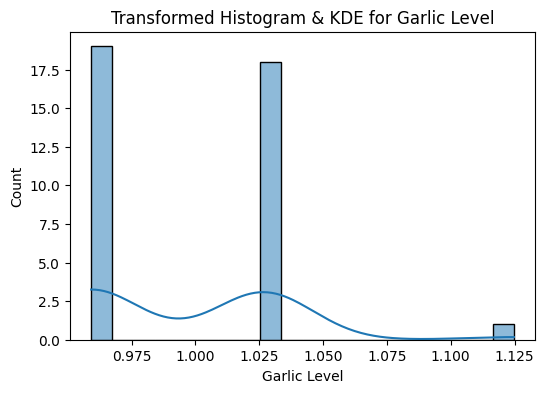

In [116]:
for feature in ["Cheese Level", "Sauce Tanginess", "Garlic Level"]:
    plt.figure(figsize=(6, 4))
    sns.histplot(data[feature], kde=True, bins=20)
    plt.title(f"Transformed Histogram & KDE for {feature}")
    plt.show()


In [239]:
#scaling data between range of 0-1
#why the minmaxscaler? useful to preserve ratios between values. here im using a known range(0-10) so min-maxscaler.
#if my data had outliers i would have used standardization(z-score).
scaler = MinMaxScaler()
scaled_features = scaler.fit_transform(data.drop(columns=["Pizza Name", "User Rating"]))
scaldata = pd.DataFrame(scaled_features, columns = data.drop(columns=["Pizza Name", "User Rating"]).columns)
scaldata["User Rating"] = data["User Rating"]

In [240]:
scaldata.head()

,Cheese Level,Sauce Tanginess,Spice Level,Garlic Level,Crunchiness,Saltiness,User Rating
0,0.807048,0.597017,0.0,0.0000,1.0,0.000000,6
1,0.000000,0.815234,0.0,0.4078,0.0,0.000000,7
2,0.000000,0.000000,0.0,0.0000,1.0,0.666667,7
3,0.807048,0.000000,0.0,0.0000,0.0,1.000000,8
4,0.000000,0.000000,0.0,0.4078,1.0,0.666667,7


In [241]:

X = scaldata[['Cheese Level','Garlic Level', 'Sauce Tanginess', 'Crunchiness', 'Saltiness','Spice Level']]
y = scaldata['User Rating']
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state = 42)

In [243]:
#Case 1: traning the model with all features and on linear regression
model = LinearRegression()
model.fit(X_train, y_train)

LinearRegression()

In [244]:
y_pred = model.predict(X_test)

In [245]:
#MSE for Case 1:
mean_squared_error(y_test, y_pred)

1.0984701013253295

In [246]:
feature_importance = pd.Series(model.coef_, index=X.columns)
print(feature_importance.sort_values(ascending=False))

Cheese Level       1.022124
Crunchiness        0.074642
Spice Level        0.064699
Saltiness         -0.240939
Garlic Level      -0.868019
Sauce Tanginess   -1.665748
dtype: float64


In [247]:
#Case 2: Training the model with feature selection
X_train = X_train.drop(columns=[ "Spice Level", "Saltiness", "Sauce Tanginess"])
X_test = X_test.drop(columns=[ "Spice Level", "Saltiness", "Sauce Tanginess"])

In [248]:
#mse after training the model with feature selection
model.fit(X_train, y_train)
y_pred = model.predict(X_test)
new_mse = mean_squared_error(y_test, y_pred)
print("New MSE after feature selection:", new_mse)

New MSE after feature selection: 0.5610302585846852


In [249]:
feature_importance = pd.Series(model.coef_, index=X_train.columns)
print(feature_importance.sort_values(ascending=False))

Cheese Level    1.016573
Crunchiness    -0.157844
Garlic Level   -0.721874
dtype: float64


In [250]:
#Case 3: Feature selection and ridge regression
ridge = Ridge(alpha=1.0)
ridge.fit(X_train, y_train)
y_pred_ridge = ridge.predict(X_test)

#mse after model selection and ridge regression
mse_ridge = mean_squared_error(y_test, y_pred_ridge)
print("MSE with Ridge Regression:", mse_ridge)

MSE with Ridge Regression: 0.5330441097506016


In [251]:
feature_importance_ridge = pd.Series(ridge.coef_, index=X_train.columns)
print(feature_importance_ridge.sort_values(ascending=False))

Cheese Level    0.771891
Crunchiness    -0.141305
Garlic Level   -0.487566
dtype: float64
